# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [4]:
df1


,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
...,...,...,...
195,b,9.308194,two
196,a,3.931530,two
197,a,3.385066,two
198,b,8.247980,two


In [22]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [23]:
df1.pivot_table('x', 'group', 'time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [24]:
pd.crosstab(df1.group, df1.time)

time,one,two
group,,
a,87,15
b,13,85


In [ ]:
for subgroup, x in df1.groupby(['group, 'time']).x:
                                plt.hist(x, )

<AxesSubplot:xlabel='x', ylabel='time'>

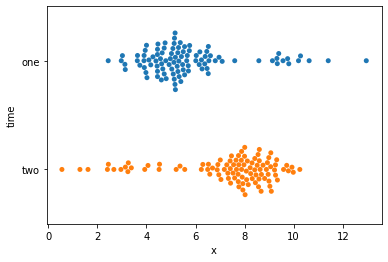

In [6]:
sns.swarmplot(x="x", y="time", data=df1)




In [11]:
df2

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a
...,...,...,...
195,109.263191,647.120801,d
196,108.898932,640.437291,d
197,109.539255,629.554555,d
198,105.879511,647.396688,d


<AxesSubplot:xlabel='x', ylabel='y'>

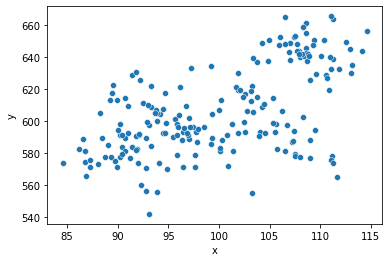

In [16]:
sns.scatterplot(x="x", y="y", data=df2)

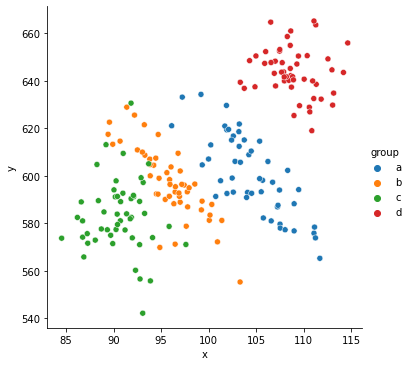

In [28]:
sns.relplot(data=df2, y='y', x='x', hue='group')

In [14]:
df3


,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1
...,...,...,...
995,A,appendectomy,1
996,B,heart bypass,1
997,B,heart bypass,0
998,A,heart bypass,0


In [15]:
import pyspark
from pyspark.sql.functions import *

spark = pyspark.sql.SparkSession.builder.getOrCreate() #method to create spark session

In [17]:
df4 = spark.createDataFrame(df3)
df4.show(5)

+-------+------------+-------+
|surgeon|     surgery|success|
+-------+------------+-------+
|      A|appendectomy|      1|
|      B|appendectomy|      1|
|      A|heart bypass|      0|
|      A|appendectomy|      1|
|      A|heart bypass|      1|
+-------+------------+-------+
only showing top 5 rows



In [31]:
df3.query('surgery == "heart_bypass"').groupby('surgeon').success.mean()

Series([], Name: success, dtype: int64)

In [30]:
pd.crosstab(df3.surgeon, df3.surgery)

surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418
